In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.text as txt
import matplotlib.lines as lines
from matplotlib.colors import ListedColormap
import time
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

from IPython import display
import pylab as pl
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Perceptron Demo
### This is the version that assumes that the data is linearly separable

In [2]:
#set parameters
num0 = 6
num1 = 6
marg_size = 0.3

In [3]:
#generate a sample data set
alpha = marg_size/2
angs0 = np.r_[np.array([[alpha],[np.pi-alpha]]),(np.pi-2*alpha)*np.random.rand(num0-2,1)+alpha]
angs1 = np.r_[np.array([[-alpha],[-np.pi+alpha]]),(-np.pi+2*alpha)*np.random.rand(num0-2,1)-alpha]
rota = np.random.rand()*np.pi
angs0 = np.mod(angs0+rota,2*np.pi)
angs1 = np.mod(angs1+rota,2*np.pi)
x0 = np.c_[np.cos(angs0),np.sin(angs0)]
x1 = np.c_[np.cos(angs1),np.sin(angs1)]
x = np.r_[x0,x1]
#generate labels
y = np.r_[-1*np.ones([num0,1]),np.ones([num1,1])]
#[repmat(-1,num0,1); repmat(+1,num1,1)];

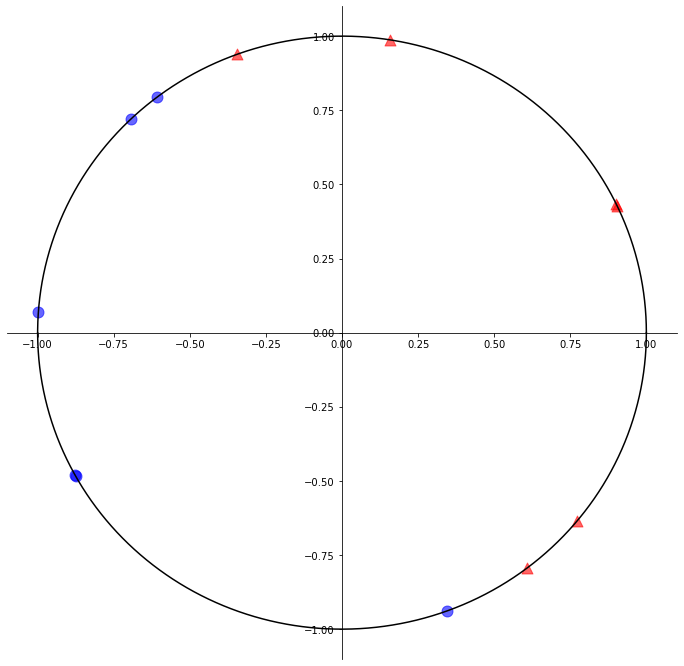

In [4]:
#show the data
fig = plt.figure(figsize=(12, 12))

#ax = fig.add_subplot(111)
a = np.arange(0,np.pi,0.001)
#ax.plot(np.cos(a),np.sin(a),c='k')
#ax.plot(np.cos(a),-np.sin(a),c='k')
pl.plot(np.cos(a),np.sin(a),c='k')
pl.plot(np.cos(a),-np.sin(a),c='k')
ax = pl.gca()
# following four lines are just to center the axes
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
# add data
ax.scatter(x0[:,0],x0[:,1],s=120,alpha=0.6,c='b',marker='o')
ax.scatter(x1[:,0],x1[:,1],s=120,alpha=0.6,c='r',marker='^')

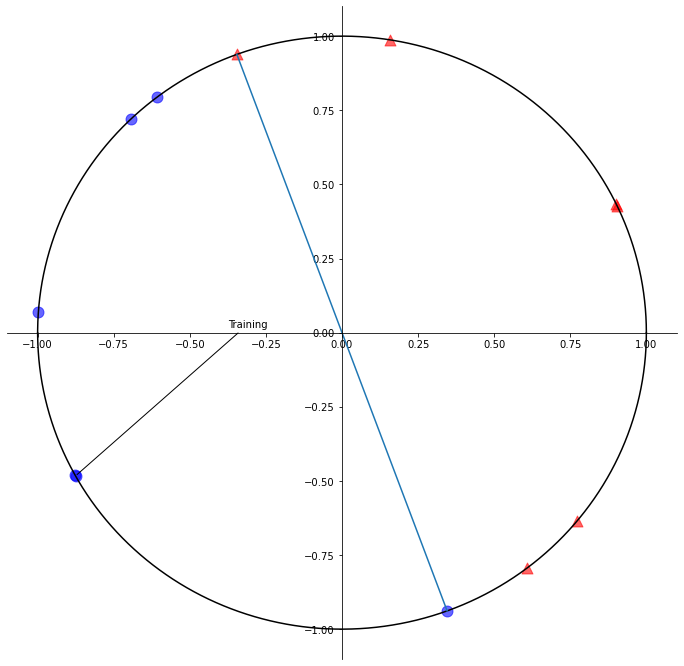

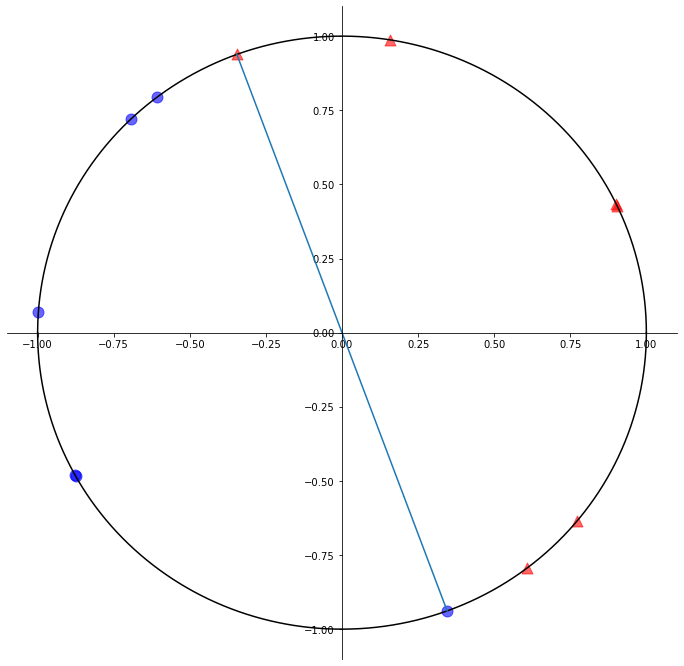

In [6]:
#show the data
fig = plt.figure(figsize=(12, 12))

#ax = fig.add_subplot(111)
a = np.arange(0,np.pi,0.001)
#ax.plot(np.cos(a),np.sin(a),c='k')
#ax.plot(np.cos(a),-np.sin(a),c='k')
pl.plot(np.cos(a),np.sin(a),c='k')
pl.plot(np.cos(a),-np.sin(a),c='k')
ax = pl.gca()
# following four lines are just to center the axes
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
# add data
ax.scatter(x0[:,0],x0[:,1],s=120,alpha=0.6,c='b',marker='o')
ax.scatter(x1[:,0],x1[:,1],s=120,alpha=0.6,c='r',marker='^')
#initialize weights
w = np.array([0,0])
r = np.random.permutation(num0+num1)
u = False
for iter in range(2):
    for ind in r:
        # label the current training instance
        an = txt.Annotation("Training",xy=x[ind,:],xytext=(x[ind,0]+0.5, x[ind,1]+0.5),arrowprops=dict(arrowstyle="-")) 
        ax.add_artist(an)
        display.clear_output(wait=True)
        display.display(pl.gcf())
        # get prediction according to current w
        ypred = np.dot(x[ind,:],w)
        # check for mistakes
        if ypred*y[ind] <= 0:
            # update w
            w = w + y[ind]*x[ind,:]
            # plot w
            w0=w/np.linalg.norm(w);
            pt=[w0[1],-w0[0]];
            if u:
                ln.remove()
            ln = lines.Line2D([pt[0],-pt[0]],[pt[1], -pt[1]])
            ax.add_line(ln)
            u = True
        time.sleep(1.0)
        an.remove()

## Perceptron Demo
### For the non-separable case

In [7]:
def computeLoss(X,y,w):
    X1 = np.hstack([np.ones([X.shape[0],1]), X])
    ypred = np.dot(X1,w)
    return 0.5*np.sum((y - ypred)**2)

In [8]:
def computeMistakes(X,y,w):
    X1 = np.hstack([np.ones([X.shape[0],1]), X])
    ypred = np.dot(X1,w)
    ypred1 = np.zeros(ypred.shape)
    ypred1[ypred > 0] = 1
    ypred1[ypred < 0] = -1
    return len(np.where(ypred1 != y)[0])

In [9]:
def computeGradient(X,y,w):
    X1 = np.hstack([np.ones([X.shape[0],1]), X])
    ypred = np.dot(X1,w)
    #print(ypred)
    grad = np.zeros(w.shape)
    for j in range(len(grad)):
        grad[j] = -np.dot((y - ypred).transpose(),X1[:,j:j+1])
    return grad

In [10]:
def plotBoundary(X,y,w,ax):
    h = .02  # step size in the mesh

    X1_min, X1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    X2_min, X2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    X1_, X2_ = np.meshgrid(np.arange(X1_min, X1_max, h),np.arange(X2_min, X2_max, h))
    Xpred = np.c_[np.ones(len(X1_.ravel())),X1_.ravel(), X2_.ravel()]
    ypred = np.dot(Xpred,w)
    ypred_ = np.zeros(ypred.shape)
    ypred_[ypred >= 0] = 1
    ypred_[ypred < 0] = -1
    ypred = ypred_.reshape(X1_.shape)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax.pcolormesh(X1_, X2_, ypred, cmap=cm_bright,alpha=.1)
    sp = ax.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap=cm_bright)
    
    ax.set_xlim(X1_.min(), X1_.max())
    ax.set_ylim(X2_.min(), X2_.max())
    ax.set_xticks(())
    ax.set_yticks(())

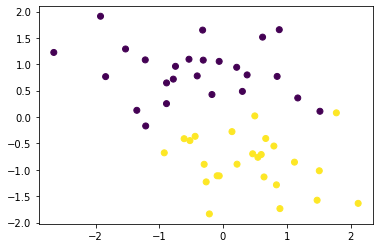

In [11]:
# prepare data
# make_blobs is a function provided by sklearn to generate synthetic data
X, y = make_blobs(n_samples=50, centers=2, n_features=2, random_state=0)
X = StandardScaler().fit_transform(X)
y[y == 0] = -1
y = y[:,np.newaxis]
plt.scatter(X[:,0],X[:,1],c=y[:,0])

In [12]:
eta = 0.2
# initialize w
w0 = np.array([1,1,1])
w0 = w0[:,np.newaxis]
w = w0
losses = []
mistakes = []
numiters = 2

[[-0.43765033 -0.36555719]
 [ 0.14036992 -0.27668837]
 [ 0.21415524  0.94284839]
 [ 0.84885893  0.76995292]
 [ 0.54705452 -0.76335605]
 [ 1.47601042 -1.57658967]
 [ 2.11998621 -1.63633158]
 [ 0.49855203  0.02136483]
 [ 0.46505902 -0.69677586]
 [-1.92216277  1.91044621]
 [ 0.62045781  1.51454344]
 [-1.52952169  1.28977604]
 [-0.31062791  1.0785308 ]
 [-0.26451892 -1.22957695]
 [ 0.30368279  0.48587525]
 [-0.1737195   0.42666367]
 [-0.78015594  0.71856329]
 [ 0.83782802 -1.28563023]
 [-1.2134782  -0.16936331]
 [-0.53416112  1.0956895 ]
 [-0.05976705 -1.11525511]
 [ 0.79802036 -0.54958565]
 [-0.29612349 -0.89588507]
 [-0.09278914 -1.11356865]
 [ 1.1207435  -0.85513207]
 [ 1.52047744  0.10911965]
 [-0.88607133  0.64673986]
 [-2.65529477  1.22424762]
 [ 0.64308498 -1.13590723]
 [ 1.17223557  0.36150007]
 [ 0.66979544 -0.40672026]
 [-1.22012863  1.08315426]
 [-0.06047022  1.05499645]
 [-1.8421822   0.76594202]
 [ 0.88236744  1.65577584]
 [ 0.2197029  -0.89365271]
 [ 0.5993474  -0.7107111 ]
 

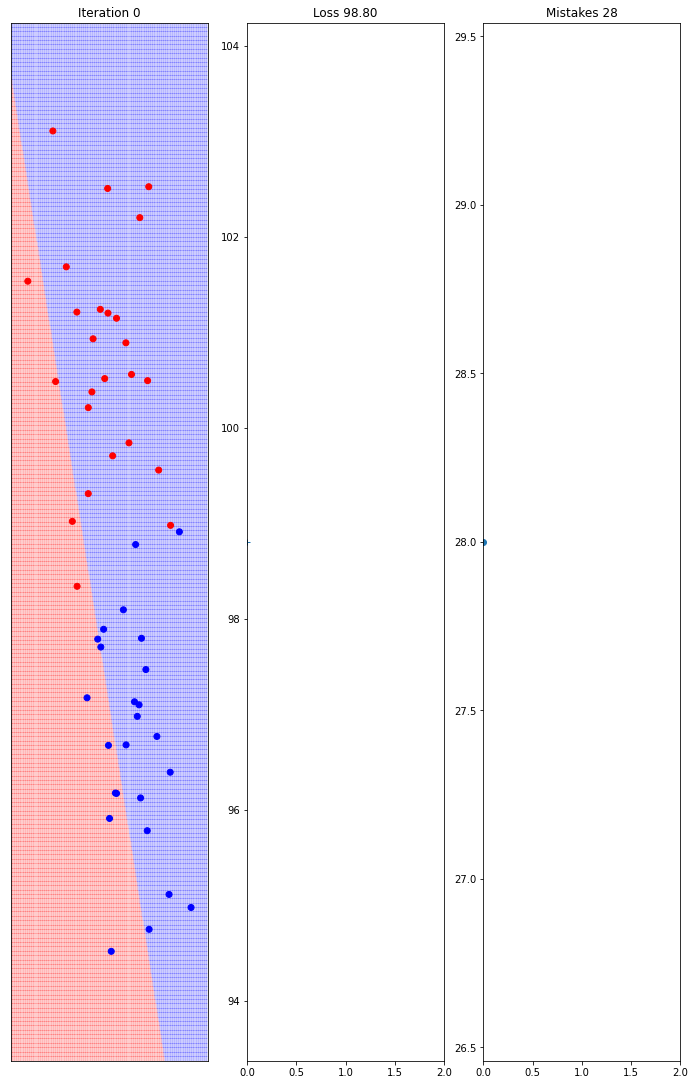

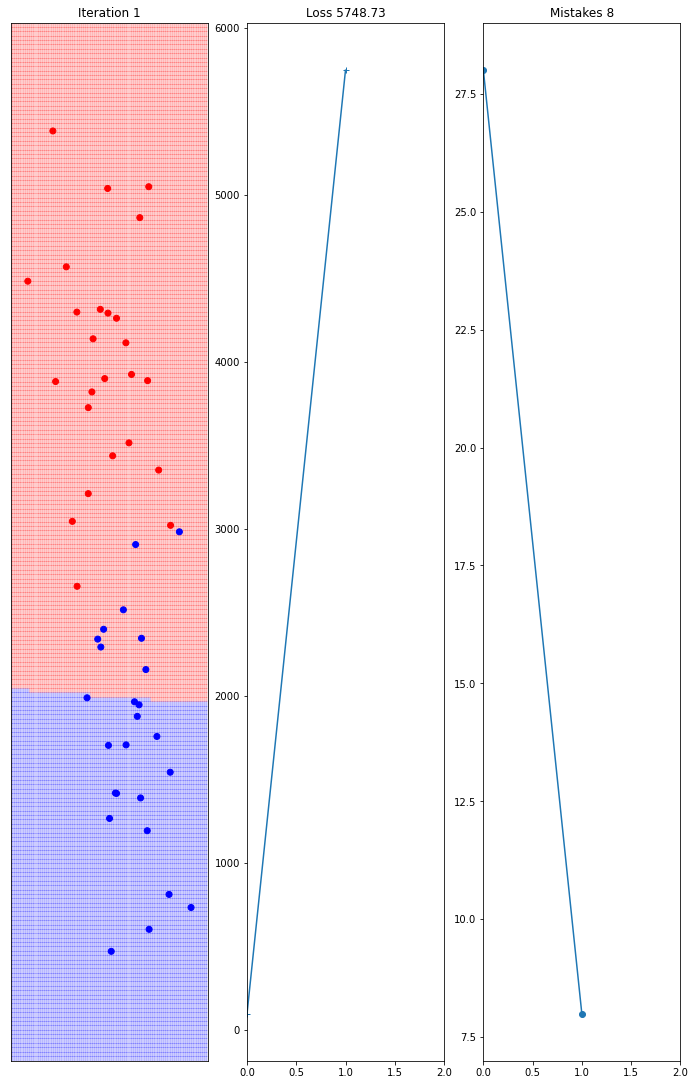

In [13]:
for iter in range(numiters):
#     print("After iteration %d"%iter)
    # compute loss
    losses.append(computeLoss(X,y,w))
    # compute number of mistakes
    mistakes.append(computeMistakes(X,y,w))
    # compute gradient
    grad = computeGradient(X,y,w)
    print(X)
    print(y)
    print(losses)
    print(mistakes)
    print(grad)
    print(w)
    fig = plt.figure(figsize=(12, 42))
    ax = fig.add_subplot(numiters,3,3*iter+1)
    # plot current boundary
    plotBoundary(X,y,w,ax)
    ax.set_title('Iteration %d'%iter)
    # plot losses
    ax = fig.add_subplot(numiters,3,3*iter+2)
    ax.plot(range(len(losses)),losses,'-+')
    ax.set_xlim([0,numiters])
    ax.set_title('Loss %.2f'%losses[iter])
    # plot mistakes
    ax = fig.add_subplot(numiters,3,3*iter+3)
    ax.plot(range(len(mistakes)),mistakes,'-o')
    ax.set_xlim([0,numiters])
    ax.set_title('Mistakes %d'%mistakes[iter])
    # update weight
    w = w - eta*grad


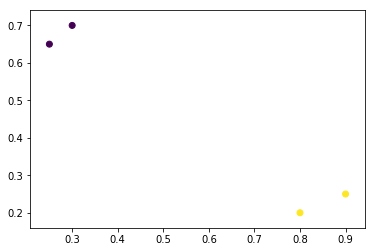

In [3]:
# 1139
X = np.array([[0.80,0.20],[0.90,0.25],[0.30,0.70],[0.25,0.65]])
y = np.array([1,1,-1,-1])
y = y[:,np.newaxis]
plt.scatter(X[:,0],X[:,1],c=y[:,0])